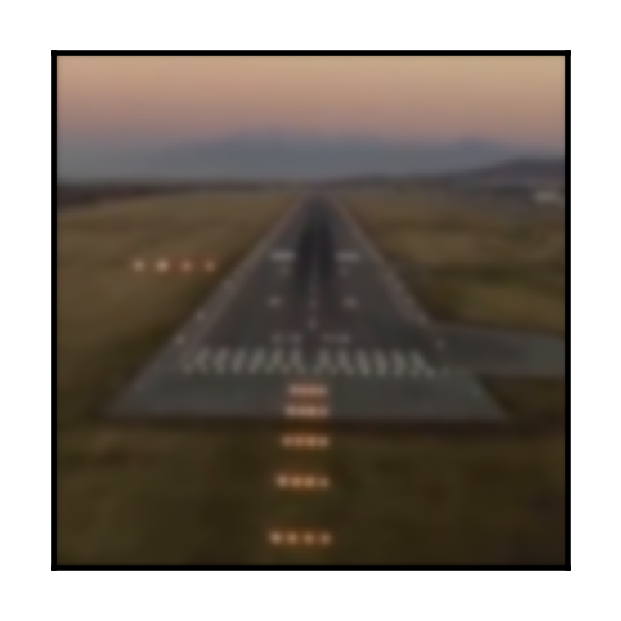

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("../Images/Cropped_Runway/00104.png")
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

def convolutionOperation(image, kernel):
    image_height = image.shape[0]
    image_widht = image.shape[1]
    
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    
    if(len(image.shape) == 3):
        image_padding = np.pad(image, pad_width=((kernel_height // 2, kernel_height // 2),(kernel_width // 2, kernel_width // 2),(0,0)), mode='constant',constant_values=0).astype(np.float32)
    elif(len(image.shape) == 2):
        image_padding = np.pad(image, pad_width=((kernel_height // 2, kernel_height // 2),(kernel_width // 2, kernel_width // 2)), mode='constant',constant_values=0).astype(np.float32)
    
    height = kernel_height // 2
    width = kernel_width // 2
    
    image_convolution = np.zeros(image_padding.shape)
    for i in range(height, image_padding.shape[0] - height):
        for j in range(width, image_padding.shape[1] - width):
            x = image_padding[i-height:i-height+kernel_height, j-width:j-width+kernel_width]
            x = x.flatten()*kernel.flatten()
            image_convolution[i][j] = x.sum()
    height_end = -height
    width_end = -width
    if(height == 0):
        return image_convolution[height:,width:width_end]
    if(width == 0):
        return image_convolution[height:height_end,width:]
#     print(image_convolution[height:height_end,width:width_end])
    return image_convolution[height:height_end,width:width_end]

def GaussianBlurImage(image, sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter =np.zeros((filter_size, filter_size), np.float32)
    m = filter_size // 2
    n = filter_size // 2
    for x in range(-m, m + 1):
        for y in range(-n, n + 1):
            x1 = 2 * np.pi * (sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2 * sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1) * x2
    im_filtered = np.zeros_like(image,dtype = np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolutionOperation(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))


plt.figure(figsize=(10,3),dpi=500)
plt.subplot(257)
plt.imshow(cv2.cvtColor(GaussianBlurImage(image, 3),cv2.COLOR_BGR2RGB),cmap ='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# cv2.imshow("Original image", image)
# cv2.imshow("Gaussian smooting", result)
# cv2.waitKey(0)